<a href="https://colab.research.google.com/github/BuiTienDat04/ASM_FINAL_7428/blob/main/ASMPART2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Read data from CSV
df = pd.read_csv('Customer_Table.csv')

# Drop rows that are completely empty
df.dropna(how='all', inplace=True)

# Strip extra spaces from strings
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Fill default values for missing fields
df['customer_email'].fillna('noemail@example.com', inplace=True)
df['customer_phone'].fillna('000-000-0000', inplace=True)
df['customer_address'].fillna('Unknown', inplace=True)
df['customer_city'].fillna('Unknown', inplace=True)
df['customer_state'].fillna('Unknown', inplace=True)
df['customer_country'].fillna('Unknown', inplace=True)
df['customer_zip'].fillna('00000', inplace=True)
df['customer_registration_date'].fillna('2000-01-01', inplace=True)
df['customer_loyalty_score'].fillna(0, inplace=True)

# Convert date format, handle errors
df['customer_registration_date'] = pd.to_datetime(df['customer_registration_date'], errors='coerce').dt.strftime('%Y-%m-%d')

# Handle records with invalid dates
df['customer_registration_date'].fillna('2000-01-01', inplace=True)

# Remove duplicate records based on customer_id
df.drop_duplicates(subset='customer_id', keep='first', inplace=True)

# Preview cleaned data
print(df.head())

# Save cleaned data to a new CSV file
df.to_csv('Cleaned_Customer_Table.csv', index=False)

df

   customer_id       customer_name                  customer_email  \
0            1       Olivia Nguyen       olivia.nguyen@example.com   
1            2           Ethan Lee           ethan.lee@example.com   
2            3  Isabella Hernandez  isabella.hernandez@example.com   
3            4    William Martinez    william.martinez@example.com   
4            5     Sophia Gonzalez     sophia.gonzalez@example.com   

      customer_phone customer_address customer_city customer_state  \
0  +1 (555) 555-1234      123 Main St      New York             NY   
1  +1 (555) 555-5678       456 Oak Rd   Los Angeles             CA   
2  +1 (555) 555-9012     789 Pine Ave       Chicago             IL   
3  +1 (555) 555-3456     321 Cedar St       Houston             TX   
4  +1 (555) 555-7890   654 Maple Blvd         Miami             FL   

  customer_country  customer_zip customer_registration_date  \
0              USA         10001                 2022-03-15   
1              USA         90001

<ipython-input-5-36e025910261>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,customer_id,customer_name,customer_email,customer_phone,customer_address,customer_city,customer_state,customer_country,customer_zip,customer_registration_date,customer_loyalty_score
0,1,Olivia Nguyen,olivia.nguyen@example.com,+1 (555) 555-1234,123 Main St,New York,NY,USA,10001,2022-03-15,85
1,2,Ethan Lee,ethan.lee@example.com,+1 (555) 555-5678,456 Oak Rd,Los Angeles,CA,USA,90001,2021-09-20,92
2,3,Isabella Hernandez,isabella.hernandez@example.com,+1 (555) 555-9012,789 Pine Ave,Chicago,IL,USA,60601,2023-01-05,78
3,4,William Martinez,william.martinez@example.com,+1 (555) 555-3456,321 Cedar St,Houston,TX,USA,77001,2022-07-28,91
4,5,Sophia Gonzalez,sophia.gonzalez@example.com,+1 (555) 555-7890,654 Maple Blvd,Miami,FL,USA,33101,2021-11-12,83
...,...,...,...,...,...,...,...,...,...,...,...
195,196,Liam Diaz,liam.diaz@example.com,+1 (555) 555-2222,369 Oak Ave,Downers Grove,IL,USA,60515,2021-01-31,91
196,197,Ava Ramirez,ava.ramirez@example.com,+1 (555) 555-3333,741 Elm Blvd,Oak Park,IL,USA,60301,2023-09-17,89
197,198,Emma Jimenez,emma.jimenez@example.com,+1 (555) 555-4444,852 Pine Cir,Palatine,IL,USA,60067,2022-04-23,92
198,199,Jacob Flores,jacob.flores@example.com,+1 (555) 555-5555,147 Maple Pl,Wheaton,IL,USA,60187,2021-08-09,90


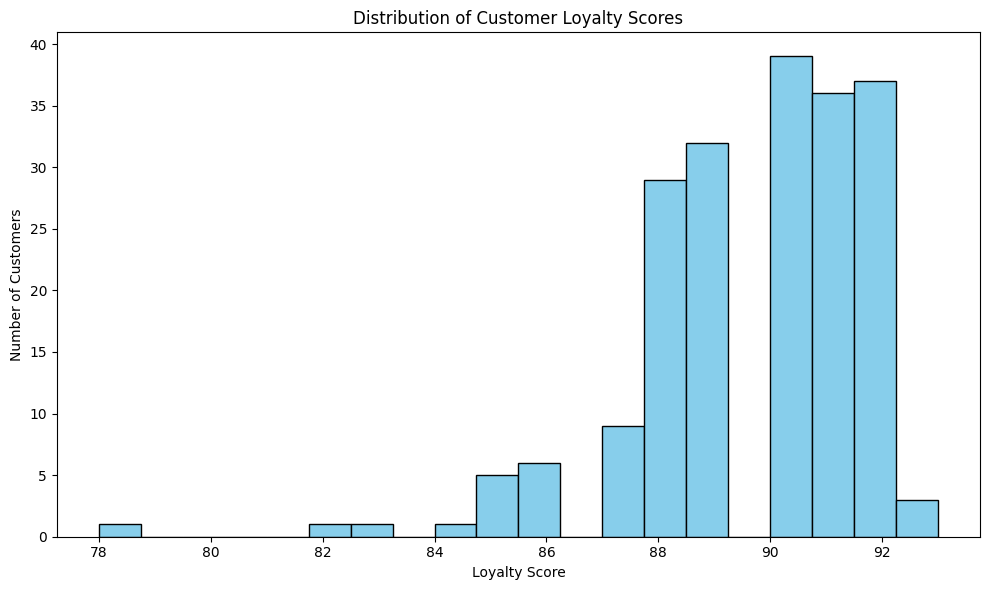

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the cleaned data
df = pd.read_csv('Cleaned_Customer_Table.csv')

# Plot a histogram of customer loyalty scores
plt.figure(figsize=(10, 6))
plt.hist(df['customer_loyalty_score'], bins=20, color='skyblue', edgecolor='black')

# Set titles and labels
plt.title('Distribution of Customer Loyalty Scores')
plt.xlabel('Loyalty Score')
plt.ylabel('Number of Customers')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Read data from CSV
df = pd.read_csv('Market_Trend.csv')

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Check the columns to ensure they match expectations
print(df.columns)

# Drop rows that are completely empty
df.dropna(how='all', inplace=True)

# Strip extra spaces from strings
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Fill default values for missing fields
columns_to_fill = {
    'trend_value': 0,
    'trend_duration': 0,
    'trend_growth_rate': 0.0,
    'trend_seasonality': 0.0,
    'trend_volatility': 0.0,
    'trend_forecast': 0.0,
    'trend_analysis': 'No analysis available'
}

for col, fill_value in columns_to_fill.items():
    if col in df.columns:
        df[col].fillna(fill_value, inplace=True)

# Convert date format, handle errors
if 'trend_date' in df.columns:
    df['trend_date'] = pd.to_datetime(df['trend_date'], errors='coerce').dt.strftime('%Y-%m-%d')
    df['trend_date'].fillna('2000-01-01', inplace=True)

# Remove duplicate records based on trend_id
if 'trend_id' in df.columns:
    df.drop_duplicates(subset='trend_id', keep='first', inplace=True)

# Preview cleaned data
print(df.head())

# Save cleaned data to a new CSV file
df.to_csv('Cleaned_Market_Trend.csv', index=False)
df

Index(['trend_id', 'product_id', 'trend_date', 'trend_value', 'trend_type',
       'trend_duration', 'trend_growth_rate', 'trend_seasonality',
       'trend_volatility', 'trend_forecast', 'trend_analysis'],
      dtype='object')
   trend_id  product_id  trend_date  trend_value trend_type  trend_duration  \
0         1           1  2023-01-01        105.3      sales              30   
1         2           2  2023-01-01         92.7      sales              30   
2         3           3  2023-01-01       1187.4      sales              30   
3         4           4  2023-01-01         97.5      sales              30   
4         5           5  2023-02-01        108.2      sales              30   

   trend_growth_rate  trend_seasonality  trend_volatility  trend_forecast  \
0               0.08               0.20              0.15           110.5   
1               0.12               0.25              0.18            99.1   
2               0.05               0.15              0.12        

<ipython-input-10-a7bcc3188241>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,trend_id,product_id,trend_date,trend_value,trend_type,trend_duration,trend_growth_rate,trend_seasonality,trend_volatility,trend_forecast,trend_analysis
0,1,1,2023-01-01,105.3,sales,30,0.08,0.20,0.15,110.5,Steady growth in sales with moderate seasonali...
1,2,2,2023-01-01,92.7,sales,30,0.12,0.25,0.18,99.1,Sales have been increasing with higher seasona...
2,3,3,2023-01-01,1187.4,sales,30,0.05,0.15,0.12,1250.2,Consistent sales growth with low to moderate s...
3,4,4,2023-01-01,97.5,sales,30,0.09,0.22,0.16,105.3,Sales have been increasing with moderate seaso...
4,5,5,2023-02-01,108.2,sales,30,0.07,0.18,0.14,112.4,Steady sales growth with some seasonality and ...
...,...,...,...,...,...,...,...,...,...,...,...
95,96,46,2024-12-01,110.6,sales,30,0.00,0.01,0.01,118.8,Sales have been increasing with moderate seaso...
96,97,47,2025-01-01,119.1,sales,30,0.00,0.00,0.00,118.8,Steady sales growth with some seasonality and ...
97,98,48,2025-01-01,106.0,sales,30,0.00,0.02,0.02,114.3,Sales have been increasing with higher seasona...
98,99,49,2025-01-01,1247.1,sales,30,0.00,0.00,0.00,1289.3,Consistent sales growth with low seasonality a...


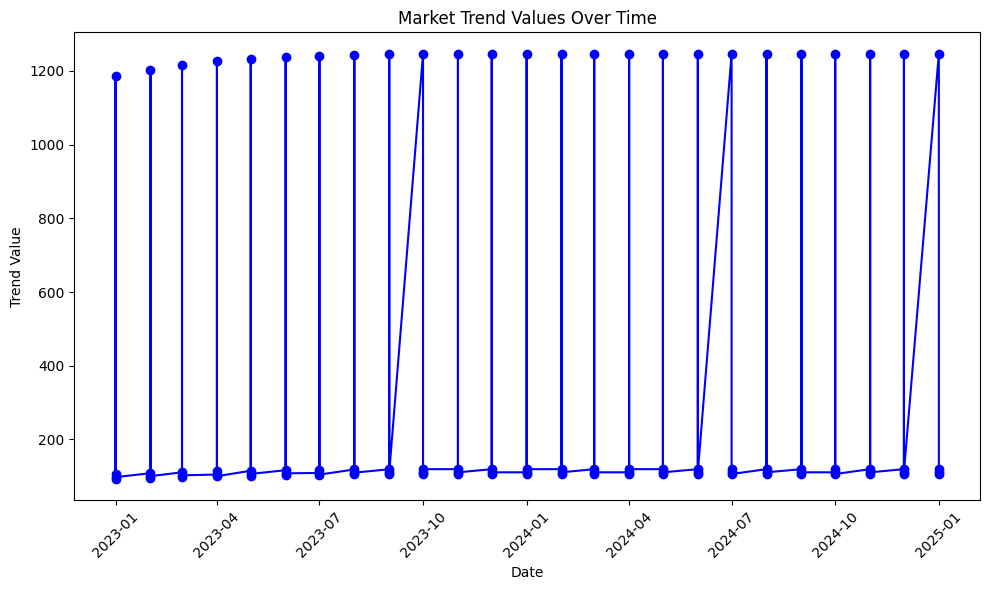

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the cleaned data
df = pd.read_csv('Cleaned_Market_Trend.csv')

# Ensure the trend_date column is in datetime format
df['trend_date'] = pd.to_datetime(df['trend_date'])

# Sort the data by date
df.sort_values('trend_date', inplace=True)

# Plot a line chart
plt.figure(figsize=(10, 6))
plt.plot(df['trend_date'], df['trend_value'], marker='o', linestyle='-', color='b')

# Set titles and labels
plt.title('Market Trend Values Over Time')
plt.xlabel('Date')
plt.ylabel('Trend Value')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Read data from CSV
df = pd.read_csv('Product_Detail.csv')

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Check the columns to ensure they match expectations
print(df.columns)

# Drop rows that are completely empty
df.dropna(how='all', inplace=True)

# Strip extra spaces from strings
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Fill default values for missing fields
columns_to_fill = {
    'product_name': 'Unknown',
    'product_description': 'No description available',
    'product_category': 'Uncategorized',
    'product_brand': 'Generic',
    'product_model': 'Model X',
    'product_price': 0.0,
    'product_cost': 0.0,
    'product_quantity': 0,
    'product_group_id': 0,
    'product_status': 'Unavailable'
}

for col, fill_value in columns_to_fill.items():
    if col in df.columns:
        df[col].fillna(fill_value, inplace=True)

# Remove duplicate records based on product_id
if 'product_id' in df.columns:
    df.drop_duplicates(subset='product_id', keep='first', inplace=True)

# Preview cleaned data
print(df.head())

# Save cleaned data to a new CSV file
df.to_csv('Cleaned_Product_Detail.csv', index=False)
df

Index(['product_id', 'product_name', 'product_description', 'product_category',
       'product_brand', 'product_model', 'product_price', 'product_cost',
       'product_quantity', 'product_group_id', 'product_status'],
      dtype='object')
   product_id         product_name  \
0           1  Wireless Headphones   
1           2      Fitness Tracker   
2           3        Gaming Laptop   
3           4          Instant Pot   
4           5       Cordless Drill   

                                 product_description    product_category  \
0  High-quality, noise-cancelling wireless headph...         Electronics   
1  Sleek and durable fitness tracker with heart r...    Health & Fitness   
2  Powerful gaming laptop with a 15.6-inch displa...           Computers   
3  Versatile pressure cooker that can also be use...  Kitchen Appliances   
4  Lightweight and powerful cordless drill with a...               Tools   

   product_brand product_model  product_price  product_cost  product_qua

<ipython-input-11-456b34b5fb75>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,product_id,product_name,product_description,product_category,product_brand,product_model,product_price,product_cost,product_quantity,product_group_id,product_status
0,1,Wireless Headphones,"High-quality, noise-cancelling wireless headph...",Electronics,AudioTech,WH-1000XM4,199.99,79.99,100,1,Active
1,2,Fitness Tracker,Sleek and durable fitness tracker with heart r...,Health & Fitness,FitSmart,FS-250,79.99,39.99,75,2,Active
2,3,Gaming Laptop,Powerful gaming laptop with a 15.6-inch displa...,Computers,GamingPro,GP-X15,1299.99,899.99,50,3,Active
3,4,Instant Pot,Versatile pressure cooker that can also be use...,Kitchen Appliances,KitchenMaster,KM-IP8,99.99,59.99,80,4,Active
4,5,Cordless Drill,Lightweight and powerful cordless drill with a...,Tools,PowerMax,PM-CD20,89.99,49.99,60,5,Active
5,6,Smartwatch,Stylish and feature-rich smartwatch with heart...,Electronics,TechSavvy,TS-SW45,199.99,99.99,90,1,Active
6,7,DSLR Camera,High-resolution DSLR camera with interchangeab...,Photography,CameraExpert,CE-D5600,799.99,499.99,40,6,Active
7,8,Patio Set,Comfortable outdoor patio set including a sofa...,Home & Garden,OutdoorLiving,OL-PS6,599.99,349.99,30,7,Active
8,9,Robotic Vacuum,Intelligent robotic vacuum cleaner with advanc...,Home Appliances,CleanMaster,CM-RV700,399.99,249.99,55,8,Active
9,10,Electric Toothbrush,Rechargeable electric toothbrush with multiple...,Personal Care,OralCare,OC-ET350,59.99,29.99,80,9,Active


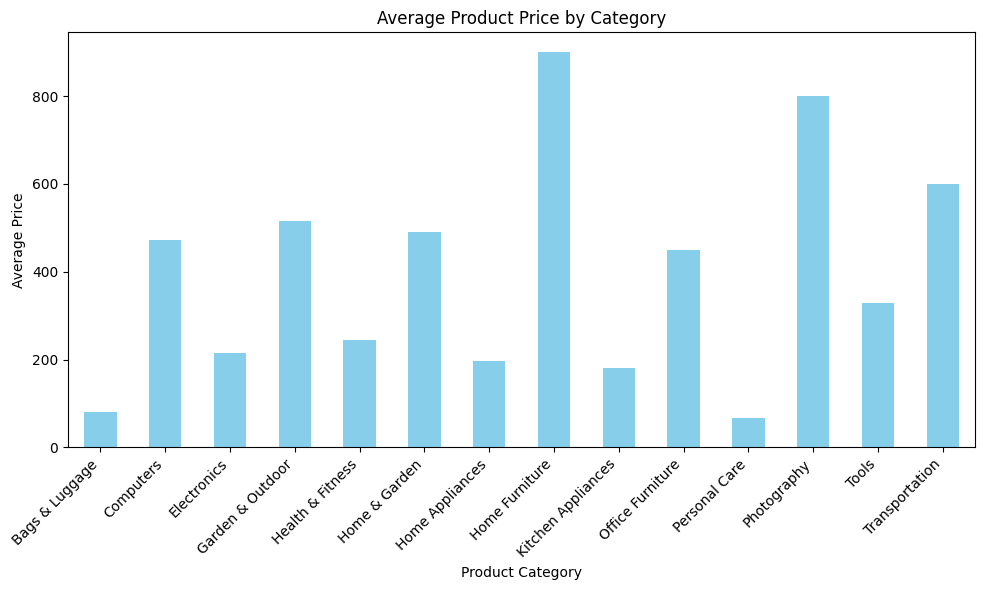

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read cleaned data from CSV
df = pd.read_csv('Cleaned_Product_Detail.csv')

# Group by product category and calculate the average price
category_avg_price = df.groupby('product_category')['product_price'].mean()

# Plot the average price per category
plt.figure(figsize=(10, 6))
category_avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Product Price by Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd

# Read data from CSV
df = pd.read_csv('Product_Group.csv')

# Display the first few rows of the DataFrame to understand its structure
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop rows with all empty columns (if any)
df.dropna(how='all', inplace=True)

# Fill missing values with appropriate defaults or remove them
df['product_name'].fillna('Unknown', inplace=True)
df['product_description'].fillna('No Description', inplace=True)
df['product_price'].fillna(df['product_price'].mean(), inplace=True)
df['product_cost'].fillna(df['product_cost'].mean(), inplace=True)
df['product_inventory'].fillna(0, inplace=True)
df['product_status'].fillna('Inactive', inplace=True)

# Optionally, remove any rows with remaining missing values
df.dropna(inplace=True)

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Save cleaned data to a new CSV file
df.to_csv('Cleaned_Product_Group.csv', index=False)
df

   product_id         product_name  \
0           1  Wireless Headphones   
1           2      Fitness Tracker   
2           3        Gaming Laptop   
3           4          Instant Pot   
4           5       Cordless Drill   

                                 product_description    product_category  \
0  High-quality, noise-cancelling wireless headph...         Electronics   
1  Sleek and durable fitness tracker with heart r...    Health & Fitness   
2  Powerful gaming laptop with a 15.6-inch displa...           Computers   
3  Versatile pressure cooker that can also be use...  Kitchen Appliances   
4  Lightweight and powerful cordless drill with a...               Tools   

   product_brand product_model  product_price  product_cost  \
0      AudioTech    WH-1000XM4         199.99         79.99   
1       FitSmart        FS-250          79.99         39.99   
2      GamingPro        GP-X15        1299.99        899.99   
3  KitchenMaster        KM-IP8          99.99         59.99   

,product_id,product_name,product_description,product_category,product_brand,product_model,product_price,product_cost,product_inventory,product_group_id,product_status
0,1,Wireless Headphones,"High-quality, noise-cancelling wireless headph...",Electronics,AudioTech,WH-1000XM4,199.99,79.99,100,1,Active
1,2,Fitness Tracker,Sleek and durable fitness tracker with heart r...,Health & Fitness,FitSmart,FS-250,79.99,39.99,75,2,Active
2,3,Gaming Laptop,Powerful gaming laptop with a 15.6-inch displa...,Computers,GamingPro,GP-X15,1299.99,899.99,50,3,Active
3,4,Instant Pot,Versatile pressure cooker that can also be use...,Kitchen Appliances,KitchenMaster,KM-IP8,99.99,59.99,80,4,Active
4,5,Cordless Drill,Lightweight and powerful cordless drill with a...,Tools,PowerMax,PM-CD20,89.99,49.99,60,5,Active
5,6,Smartwatch,Stylish and feature-rich smartwatch with heart...,Electronics,TechSavvy,TS-SW45,199.99,99.99,90,1,Active
6,7,DSLR Camera,High-resolution DSLR camera with interchangeab...,Photography,CameraExpert,CE-D5600,799.99,499.99,40,6,Active
7,8,Patio Set,Comfortable outdoor patio set including a sofa...,Home & Garden,OutdoorLiving,OL-PS6,599.99,349.99,30,7,Active
8,9,Robotic Vacuum,Intelligent robotic vacuum cleaner with advanc...,Home Appliances,CleanMaster,CM-RV700,399.99,249.99,55,8,Active
9,10,Electric Toothbrush,Rechargeable electric toothbrush with multiple...,Personal Care,OralCare,OC-ET350,59.99,29.99,80,9,Active


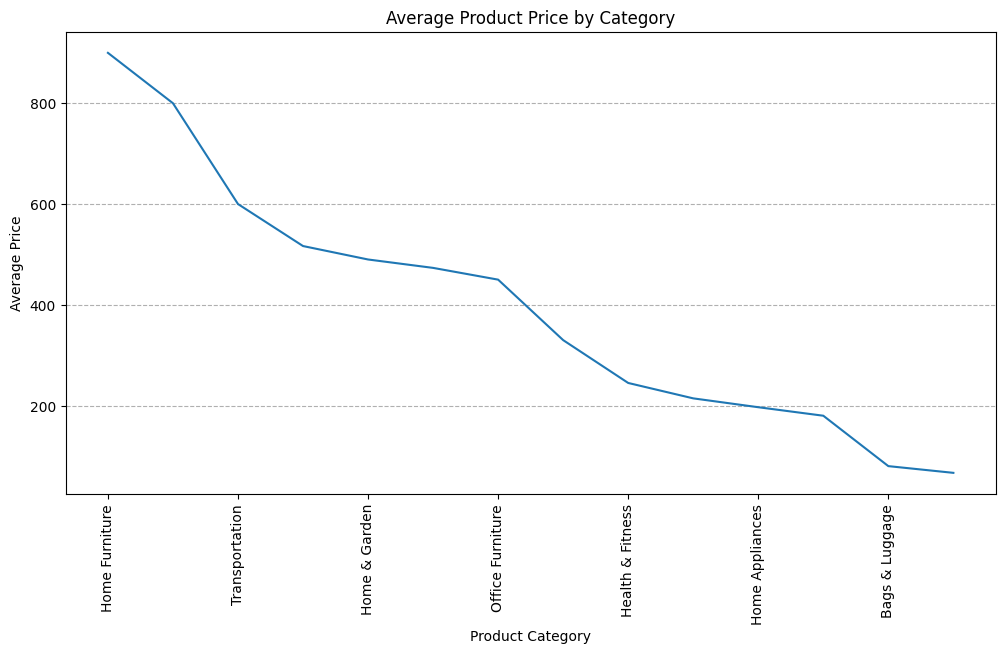

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the cleaned data
df = pd.read_csv('Cleaned_Product_Group.csv')

# Group the data by product category and calculate the mean price
product_prices = df.groupby('product_category')['product_price'].mean().sort_values(ascending=False)

# Create the line chart
plt.figure(figsize=(12, 6))
product_prices.plot(kind='line')

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.title('Average Product Price by Category')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add gridlines
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.show()

In [ ]:
import pandas as pd

# Read data from CSV (assuming the file is named 'Sales.csv')
df = pd.read_csv('Sale_Table.csv')

# Display the first few rows of the DataFrame to understand its structure
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop rows with all empty columns (if any)
df.dropna(how='all', inplace=True)

# Fill missing values with appropriate defaults or remove them
df['customer_id'].fillna(0, inplace=True)  # Assuming 0 for unknown customers
df['product_id'].fillna(0, inplace=True)  # Assuming 0 for unknown products
df['sale_date'].fillna('Unknown', inplace=True)
df['sale_quantity'].fillna(1, inplace=True)
df['sale_amount'].fillna(df['sale_amount'].mean(), inplace=True)
df['sale_discount'].fillna(0, inplace=True)
df['sale_tax'].fillna(0, inplace=True)
df['sale_payment_method'].fillna('Unknown', inplace=True)
df['sale_status'].fillna('Pending', inplace=True)
df['sale_notes'].fillna('No Notes', inplace=True)

# Optionally, remove any rows with remaining missing values
df.dropna(inplace=True)

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Save cleaned data to a new CSV file
df.to_csv('Cleaned_Sale_Table.csv', index=False)

# Display the cleaned DataFrame
df


   sale_id  customer_id  product_id  sale_date  sale_quantity  sale_amount  \
0        1            1         1.0   1/1/2022              2       100.50   
1        2            2         2.0  2/15/2022              1        75.25   
2        3            3         3.0  4/10/2022              3       150.75   
3        4            4         4.0   3/5/2022              1        85.00   
4        5            5         5.0  6/20/2022              2       120.00   

   sale_discount  sale_tax sale_payment_method sale_status  \
0              0      8.04         Credit Card   Completed   
1              5      5.42                Cash   Completed   
2              0     12.06          Debit Card   Completed   
3              0      6.80         Credit Card   Completed   
4             10      8.40                Cash   Completed   

                   sale_notes  
0  Large order, good customer  
1             Repeat customer  
2               Bulk purchase  
3                New customer 

,sale_id,customer_id,product_id,sale_date,sale_quantity,sale_amount,sale_discount,sale_tax,sale_payment_method,sale_status,sale_notes
0,1,1,1.0,1/1/2022,2,100.50,0,8.04,Credit Card,Completed,"Large order, good customer"
1,2,2,2.0,2/15/2022,1,75.25,5,5.42,Cash,Completed,Repeat customer
2,3,3,3.0,4/10/2022,3,150.75,0,12.06,Debit Card,Completed,Bulk purchase
3,4,4,4.0,3/5/2022,1,85.00,0,6.80,Credit Card,Completed,New customer
4,5,5,5.0,6/20/2022,2,120.00,10,8.40,Cash,Completed,Larger order
...,...,...,...,...,...,...,...,...,...,...,...
195,196,196,0.0,1/28/2036,1,160.00,10,11.20,Credit Card,Completed,New customer
196,197,197,0.0,3/10/2036,1,95.00,0,7.60,Cash,Completed,Loyal customer
197,198,198,0.0,6/22/2036,1,90.00,0,7.20,Debit Card,Completed,Larger order
198,199,199,0.0,5/1/2036,2,130.00,0,10.40,Credit Card,Completed,Repeat purchase


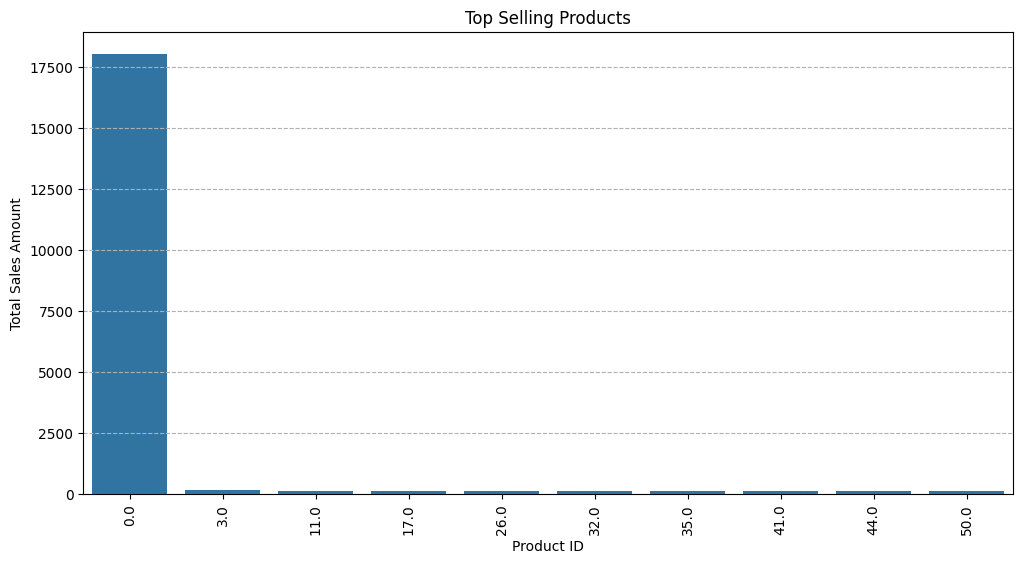

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the cleaned data
df = pd.read_csv('Cleaned_Sale_Table.csv')

# Group the data by product_id and sum the sale amount
sales_by_product = df.groupby('product_id')['sale_amount'].sum().sort_values(ascending=False).reset_index()

# Create the bar chart for the top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(x='product_id', y='sale_amount', data=sales_by_product.head(10))

# Add labels and title
plt.title('Top Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Sales Amount')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add gridlines
plt.grid(axis='y', linestyle='--')

# Display the chart
plt.show()

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('Website_Access_Category.csv')

# Display initial information
print("Initial Data Overview:")
print(df.info())
print(df.head())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
# For numerical columns, fill missing values with the mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# For categorical columns, fill missing values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Convert data types if necessary
df['access_category_id'] = df['access_category_id'].astype(str)
df['customer_id'] = df['customer_id'].astype(str)

# Display cleaned data information
print("\nCleaned Data Overview:")
print(df.info())
print(df.head())

# Save the cleaned data to a new CSV file
df.to_csv('Cleaned_Website_Access_Category.csv', index=False)
df

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   access_category_id                    200 non-null    int64  
 1   access_category_name                  200 non-null    object 
 2   access_category_description           200 non-null    object 
 3   customer_id                           200 non-null    int64  
 4   access_category_page_views            200 non-null    int64  
 5   access_category_unique_visitors       200 non-null    int64  
 6   access_category_bounce_rate           200 non-null    float64
 7   access_category_average_time_on_page  200 non-null    int64  
 8   access_category_conversion_rate       200 non-null    float64
 9   access_category_revenue_contribution  200 non-null    float64
 10  access_category_status                200 non-null    object 
d

,access_category_id,access_category_name,access_category_description,customer_id,access_category_page_views,access_category_unique_visitors,access_category_bounce_rate,access_category_average_time_on_page,access_category_conversion_rate,access_category_revenue_contribution,access_category_status
0,1,Home,Access to the website's home page,1,5236,1560,0.15,120,0.08,1256.78,Active
1,2,Products,Access to the product catalog pages,2,3948,1234,0.22,90,0.12,2187.35,Active
2,3,About Us,Access to the company's about us page,3,1879,782,0.30,70,0.05,478.92,Active
3,4,Contact,Access to the contact form and information,4,2416,990,0.18,60,0.07,695.42,Active
4,5,Blog,Access to the company blog pages,5,3721,1123,0.25,100,0.09,885.65,Active
...,...,...,...,...,...,...,...,...,...,...,...
195,196,Home,Access to the website's home page,196,14327,4821,0.53,692,0.36,5559.46,Active
196,197,Products,Access to the product catalog pages,197,11637,4442,0.55,495,0.36,6973.06,Active
197,198,About Us,Access to the company's about us page,198,4058,1943,0.69,279,0.30,920.77,Active
198,199,Contact,Access to the contact form and information,199,4543,2091,0.65,259,0.32,1634.02,Active


<ipython-input-30-a5f03c712b10>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='access_category_id', data=df, palette='tab20c')


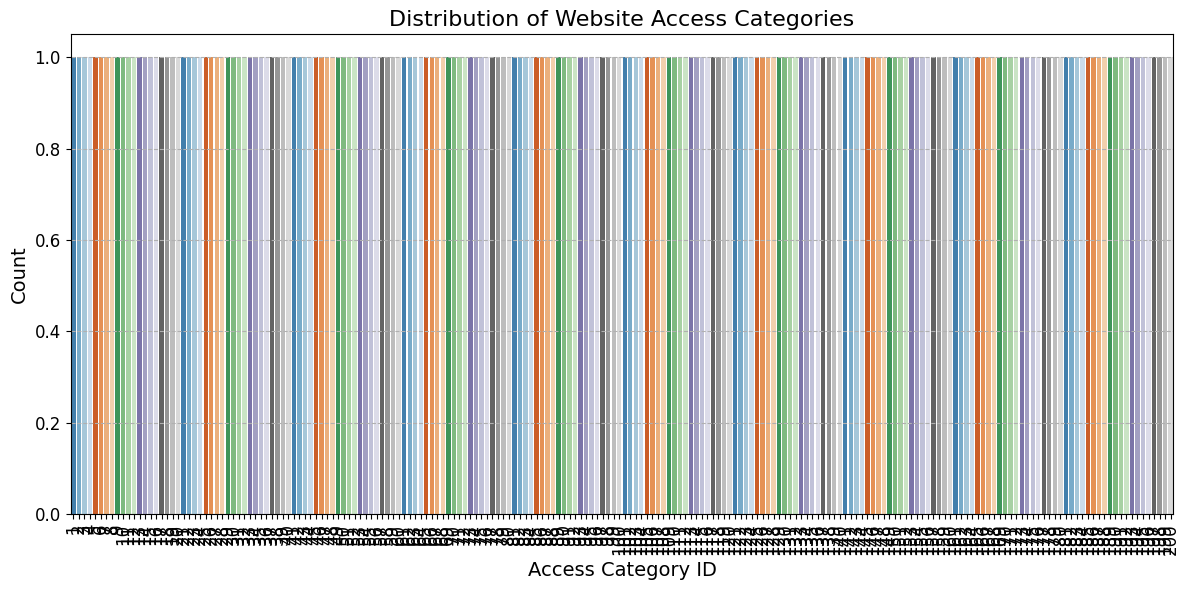

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('Cleaned_Website_Access_Category.csv')

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='access_category_id', data=df, palette='tab20c')
plt.title('Distribution of Website Access Categories', fontsize=16)
plt.xlabel('Access Category ID', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Column names in the CSV file: Index(['sale_id', 'customer_id', 'product_id', 'sale_date', 'sale_quantity',
       'sale_amount', 'sale_discount', 'sale_tax', 'sale_payment_method',
       'sale_status', 'sale_notes'],
      dtype='object')
Mean Squared Error: 2.770178762232155
R-squared: 0.9879832068030088


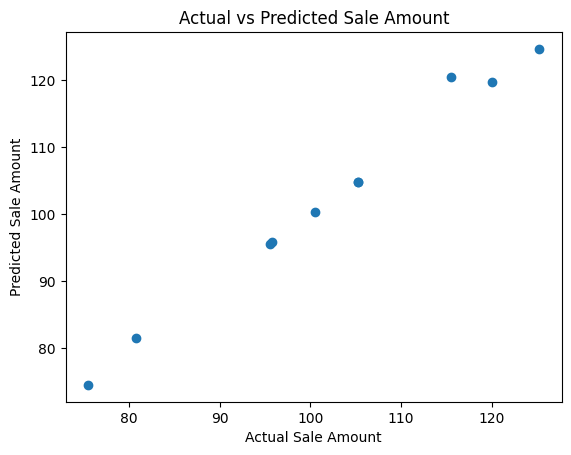

Predicted Future Sales: 15.131500652922988


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the new CSV file
data = pd.read_csv('Sale_Table.csv')

# Check the columns in the DataFrame
print("Column names in the CSV file:", data.columns)

# Data preprocessing
data = data.dropna()

# Assume the features used for prediction are sale_quantity, sale_discount, sale_tax
# The target is sale_amount
X = data[['sale_quantity', 'sale_discount', 'sale_tax']]
y = data['sale_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sale Amount')
plt.ylabel('Predicted Sale Amount')
plt.title('Actual vs Predicted Sale Amount')
plt.show()

# Predict future sales with new data
new_data = pd.DataFrame({
    'sale_quantity': [5],  # Replace with actual value
    'sale_discount': [1.5],  # Replace with actual value
    'sale_tax': [0.5]  # Replace with actual value
})

future_sales_pred = model.predict(new_data)
print(f'Predicted Future Sales: {future_sales_pred[0]}')
